In [276]:
import matplotlib.pyplot as plt
import h5py
import os
from sklearn import svm
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import  GridSearchCV
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import f1_score
import math
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
import itertools

# 1(a)

data_1.h5


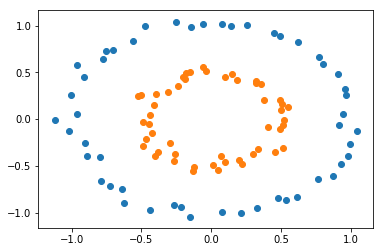

data_2.h5


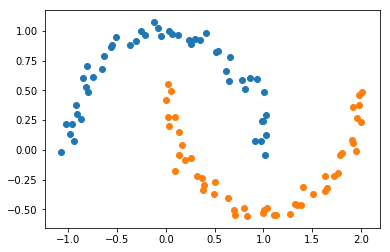

data_3.h5


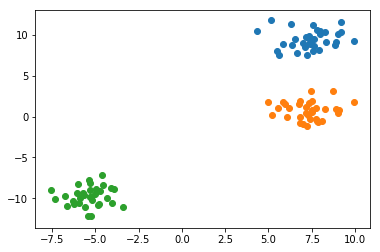

data_4.h5


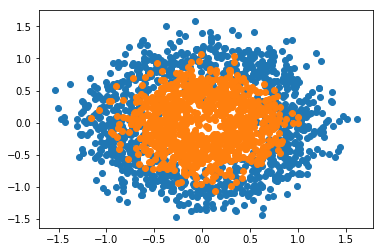

In [153]:
for data_file in os.listdir('Data'):
    print (data_file)
    path = 'Data/' + data_file
    with h5py.File(path, 'r') as dataH5:
        labels = np.array(list(dataH5['y']))
        coordinates = np.array(list(dataH5['x']))
        classes = len(set(labels))
        class1x = []
        class1y = []
        class2x = []
        class2y = []
        class3x = []
        class3y = []
        for i in range(len(labels)):
            if (labels[i] == 0):
                class1x.append(coordinates[i][0])
                class1y.append(coordinates[i][1])
            elif (labels[i] == 1):
                class2x.append(coordinates[i][0])
                class2y.append(coordinates[i][1])
            else:
                class3x.append(coordinates[i][0])
                class3y.append(coordinates[i][1])
                
        plt.scatter(class1x, class1y)
        plt.scatter(class2x, class2y)
        plt.scatter(class3x, class3y)
#         plt.title("Plot for Dataset " + (str)(i+1))
        plt.show()




# Defining Kernels for 1(ii)

In [41]:
def kernel_1(X, Y):
    return np.square(1 + np.dot(X, Y.T))

def kernel_2(X, Y):
    return np.power(1 + np.dot(X, Y.T), 3)

def kernel_3(X, Y):
    return (np.dot(X, Y.T))

def kernel_4(X, Y):
    return np.square(1 + np.dot(X, Y.T))

# Plotting decision boundaries 

1


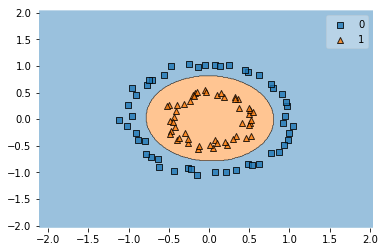

2


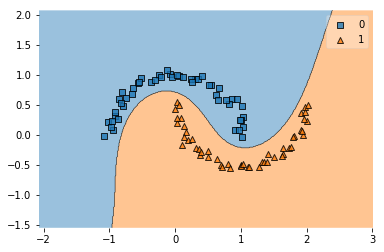

3


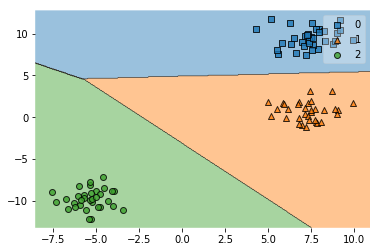

4


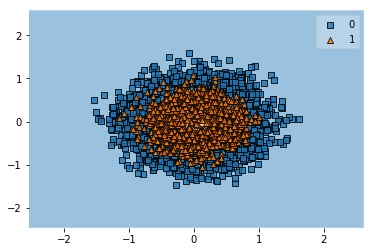

In [144]:
num_file = 1
for data_file in os.listdir('Data'):
    path = 'Data/' + data_file
    with h5py.File(path, 'r') as dataH5:
        coordinates = np.array(dataH5['x'])
        labels = np.array(dataH5['y'])
        if (num_file == 1):
            classifier = svm.SVC(kernel = kernel_1)
            print(1)
        elif (num_file == 2):
            classifier = svm.SVC(kernel = kernel_2)
            print(2)
        elif (num_file == 3):
            classifier = svm.SVC(kernel = kernel_3)
            print(3)
        elif (num_file == 4):
            classifier = svm.SVC(kernel = kernel_4)
            print(4)
        classifier.fit(coordinates, labels)
        plt.figure(num_file)
        plot_decision_regions(X = coordinates, y = labels, clf = classifier)
        
    plt.show()
    num_file+=1


# 1 (iii)  One vs All, Linear

chosen C =  1


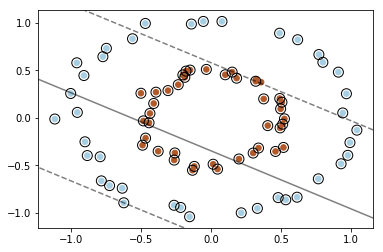

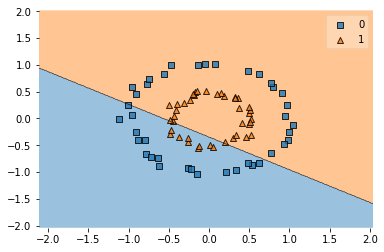

Train accuracy is: 0.625
Test accuracy is: 0.35
Test F1 score is: [0.31578947 0.38095238]
Train F1 score is: [0.54545455 0.68085106]


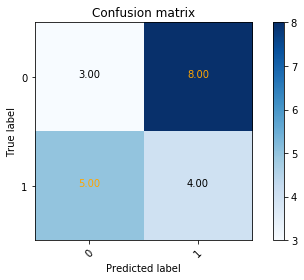

chosen C =  1000


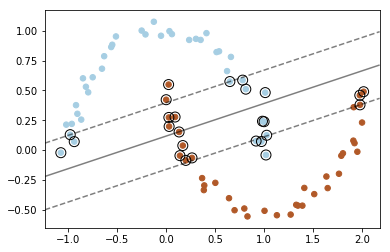

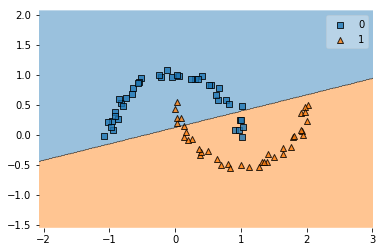

Train accuracy is: 0.8625
Test accuracy is: 0.9
Test F1 score is: [0.88888889 0.90909091]
Train F1 score is: [0.86419753 0.86075949]


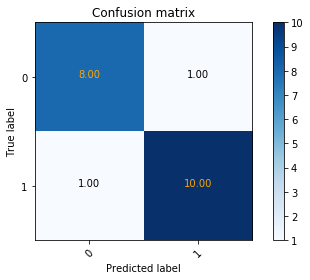

chosen C =  1000


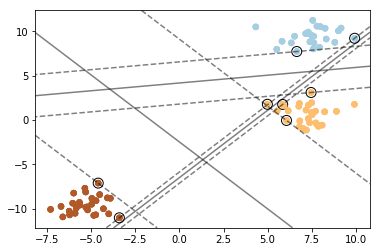

<Figure size 432x288 with 0 Axes>

Train accuracy is: 0.9875
Test accuracy is: 1.0
Test F1 score is: [1. 1. 1.]
Train F1 score is: [1.         0.98181818 0.98245614]


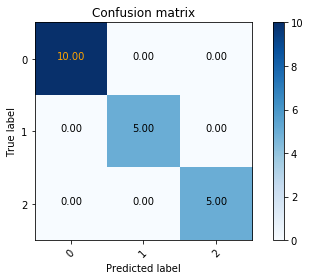

chosen C =  1


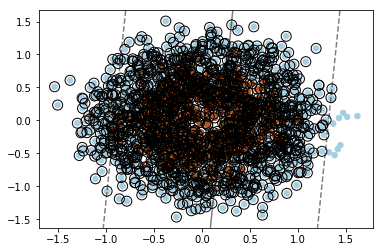

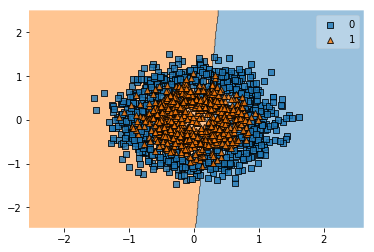

Train accuracy is: 0.544375
Test accuracy is: 0.5475
Test F1 score is: [0.47230321 0.60393873]
Train F1 score is: [0.49410132 0.58555998]


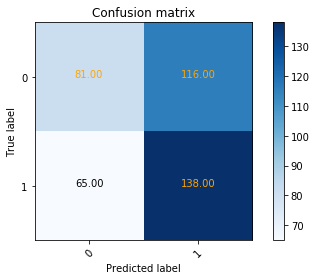

In [360]:
for data_file in os.listdir('Data'):
    path = 'Data/' + data_file
    num_file = 1
    with h5py.File(path, 'r') as dataH5:    
        labels = np.array(dataH5['y'])
        coordinates = np.array((dataH5['x']))
        #splitting dataset randomly into 80% train and 20% test
        x_train, x_test, y_train, y_test = train_test_split(coordinates, labels, test_size = 0.2)
        
        num_classes = len(np.unique(labels))
        #predicted_class
        predictions = np.zeros(shape = (num_classes, len(x_test)))
        predicted_class = []
        train_predictions = np.zeros(shape = (num_classes, len(x_train)))
        train_predicted_class = []

        C_dict = {'C' : [1000, 500, 100, 10, 4, 3.5, 3, 2.5, 2, 1, 0.1, 0.005]}
        
        classifier = GridSearchCV(svm.SVC(kernel = 'linear'), C_dict)
        classifier.fit(x_train, y_train)
        C_linear = classifier.best_params_.get("C")
        print ("chosen C = ", C_linear)
        
        if(num_classes>2):
            for i in range(num_classes):  #one vs rest
                new_y = []
                for j in range(len(y_train)):
                    if (y_train[j] == i):
                        new_y.append(1)
                    else:
                        new_y.append(0)
                        
                linear_classifier = svm.SVC(kernel = 'linear', C = C_linear)
                linear_classifier.fit(x_train, new_y)
                
                weights = linear_classifier.coef_[0]
                intercept = linear_classifier.intercept_[0]       
                
                for k in range(len(x_test)):
                    value = np.dot(weights, x_test[k]) + intercept
                    predictions[i][k] = value
                
                for k in range(len(x_train)):
                    value = np.dot(weights, x_train[k]) + intercept
                    train_predictions[i][k] = value
                    
                plt.figure(0)
                plot_support_vectors(x_train, y_train, linear_classifier)
                plt.figure(1)
                new_y = np.array(new_y)
#                 plot_decision_regions(x_train, new_y, linear_classifier)
            plt.show()
            predicted_class = np.argmax(predictions, axis = 0)
            train_predicted_class = np.argmax(train_predictions, axis = 0)
        else:
            linear_classifier = svm.SVC(kernel = 'linear', C = C_linear)
            linear_classifier.fit(x_train, y_train)
            
            plot_support_vectors(x_train, y_train, linear_classifier)
            plt.show()
            plot_decision_regions(X = x_train, y = y_train, clf = linear_classifier)
            plt.show()
            weights = linear_classifier.coef_[0]
            intercept = linear_classifier.intercept_[0]
            for i in range(len(x_test)):
                value = np.dot(weights, x_test[i]) + intercept
                if (value < 0):
                    predicted_class.append(0)
                else:
                    predicted_class.append(1)
            
            for i in range(len(x_train)):
                value = np.dot(weights, x_train[i]) + intercept
                if (value < 0):
                    train_predicted_class.append(0)
                else:
                    train_predicted_class.append(1)
        
        test_correct_predictions = 0
        train_correct_predictions = 0
        for i in range(len(x_test)):
            if (predicted_class[i] == y_test[i]):
                test_correct_predictions+=1
       
        for i in range(len(x_train)):
            if (train_predicted_class[i] == y_train[i]):
                train_correct_predictions+=1
        
        test_f1_score = f1_score(y_test, predicted_class, average = None)
        train_f1_score = f1_score(y_train, train_predicted_class, average = None)
        test_accuracy = test_correct_predictions/len(y_test)
        train_accuracy = train_correct_predictions/len(y_train)
        print("Train accuracy is:", train_accuracy)
        print("Test accuracy is:", test_accuracy)
        print("Test F1 score is:", test_f1_score)
        print("Train F1 score is:", train_f1_score)
        make_confusion_matrix(y_test, predicted_class, num_classes)

        plt.show()


# One vs one, Linear

chosen C =  1000


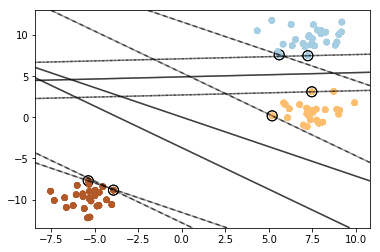

One vs one accuracy for 3rd dataset: 1.0


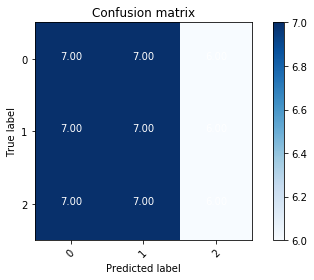

In [326]:
with h5py.File('Data/data_3.h5', 'r') as dataH5:
    labels = np.array(dataH5['y'])
    coordinates = np.array((dataH5['x']))
        #splitting dataset randomly into 80% train and 20% test
    x_train, x_test, y_train, y_test = train_test_split(coordinates, labels, test_size = 0.2)
    num_classes = len(np.unique(labels))
    
    predictions = np.full((len(x_test), num_classes), 0)
    predicted_class = []
    
    C_dict = {'C' : [1000, 500, 100, 50, 20, 10, 4, 3.5, 3, 2.5, 2, 1, 0.1, 0.005, 0.003]}
    linear_classifier = GridSearchCV(svm.SVC(kernel = 'linear'), C_dict)
    linear_classifier.fit(x_train, y_train)
    C_linear = linear_classifier.best_params_.get("C")
    print ("chosen C = ", C_linear)
    
    for i in range(num_classes):  #one vs one
        for j in range(num_classes):
            if (i == j):
                continue
            x_train_new = []
            y_train_new = []
            for k in range(len(x_train)):
                if (y_train[k] == i):
                    x_train_new.append(x_train[k])
                    y_train_new.append(0)
                elif (y_train[k] == j):
                    x_train_new.append(x_train[k])
                    y_train_new.append(1)
                    
            linear_classifier = svm.SVC(kernel = 'linear', C = C_linear)
            linear_classifier.fit(x_train_new, y_train_new)
            weights = linear_classifier.coef_[0]
            intercept = linear_classifier.intercept_[0]       
            for k in range(len(x_test)):
                value = np.dot(weights, x_test[k]) + intercept
                if (value < 0):
                    predictions[k][i]+=1
                else:
                    predictions[k][j]+=1
            plot_support_vectors(x_train, y_train, linear_classifier)
#     print(predictions)
    plt.show()
    for k in range(len(x_test)):
        predicted_class.append(np.argmax(predictions[k]))
#         print("appended value is: ", np.argmax(predictions[k]))

    test_correct_predictions = 0

    for i in range(len(x_test)):
        if (predicted_class[i] == y_test[i]):
            test_correct_predictions+=1

    print("One vs one accuracy for 3rd dataset:", test_correct_predictions/len(x_test))
#     predicted_values = np.argmax(predictions, axis = 0)
    make_confusion_matrix(y_test, predicted_class, num_classes)
    plt.show()
#     print(predictions2, "hello")

# 1(iv) One vs rest, RBF

chosen C =  10


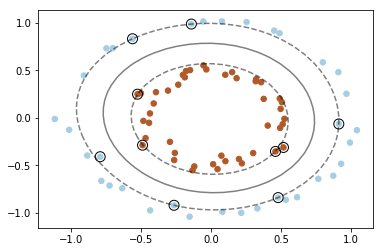

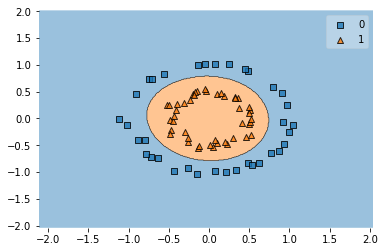

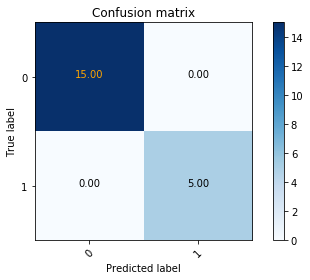

Train accuracy is: 1.0
Test accuracy is: 1.0
Test F1 score is: [1. 1.]
Train F1 score is: [1. 1.]
chosen C =  10


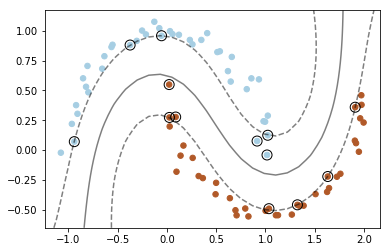

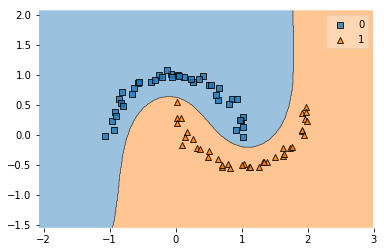

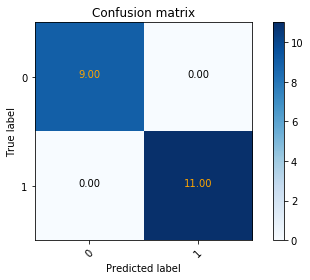

Train accuracy is: 1.0
Test accuracy is: 1.0
Test F1 score is: [1. 1.]
Train F1 score is: [1. 1.]
chosen C =  10


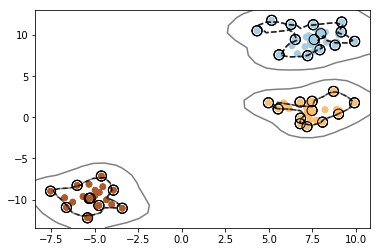

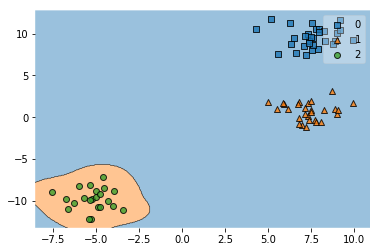

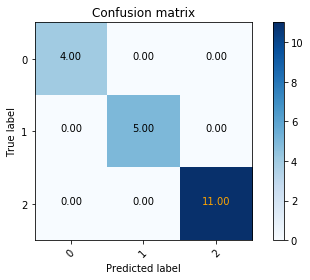

Train accuracy is: 1.0
Test accuracy is: 1.0
Test F1 score is: [1. 1. 1.]
Train F1 score is: [1. 1. 1.]
chosen C =  2.5


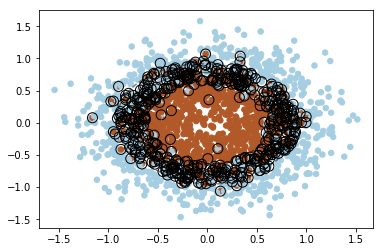

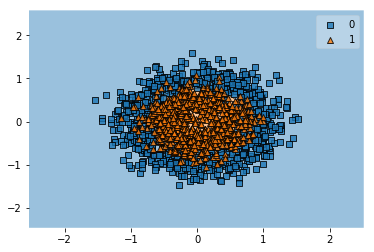

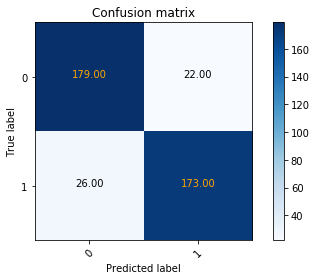

Train accuracy is: 0.88375
Test accuracy is: 0.88
Test F1 score is: [0.8817734  0.87817259]
Train F1 score is: [0.88418431 0.88331242]


In [361]:
for data_file in os.listdir('Data'):
    path = 'Data/' + data_file
    num_file = 1
    with h5py.File(path, 'r') as dataH5:    
        labels = np.array(dataH5['y'])
        coordinates = np.array((dataH5['x']))
        #splitting dataset randomly into 80% train and 20% test
        x_train, x_test, y_train, y_test = train_test_split(coordinates, labels, test_size = 0.2)
        
        num_classes = len(np.unique(labels))
        #predicted_class
        predictions = np.zeros(shape = (num_classes, len(x_test)))
        predicted_class = []
        train_predictions = np.zeros(shape = (num_classes, len(x_train)))
        train_predicted_class = []

        C_dict = {'C' : [10, 4, 3.5, 3, 2.5, 2, 1, 0.1, 0.5, 0.005, 0.003]}
        Gamma_dict = {'C' : [10, 4, 3.5, 3, 2.5, 2, 1, 0.1, 0.005, 0.003]}

        classifier = GridSearchCV(svm.SVC(kernel = 'rbf'), C_dict)
        classifier.fit(x_train, y_train)
        C_rbf = classifier.best_params_.get("C")
#         Gamma_rbf = classifier.best_params_.get("gamma")
        print ("chosen C = ", C_rbf)
        
        if(num_classes>2):
            for i in range(num_classes):  #one vs rest
                new_y = []
                for j in range(len(y_train)):
                    if (y_train[j] == i):
                        new_y.append(1)
                    else:
                        new_y.append(0)
                        
                rbf_classifier = svm.SVC(kernel = 'rbf', C = C_rbf)
                rbf_classifier.fit(x_train, new_y)
                
                support_vectors = rbf_classifier.support_vectors_
                intercept = rbf_classifier.intercept_[0]       
                y_alpha = rbf_classifier.dual_coef_
                
                for k in range(len(x_test)):
                    sum = 0
                    for l in range(len(support_vectors)):
                        sum += np.transpose(y_alpha)[l]*math.exp(-0.5*np.linalg.norm(support_vectors[l] - x_test[k])**2)
                    value = sum + intercept
                    predictions[i][k] = value
                
                for k in range(len(x_train)):
                    sum = 0
                    for l in range(len(support_vectors)):
                        sum += np.transpose(y_alpha)[l]*math.exp(-0.5*np.linalg.norm(support_vectors[l] - x_train[k])**2)
                    value = sum + intercept
                    train_predictions[i][k] = value
                    
                plt.figure(0)
                plot_support_vectors(x_train, y_train, rbf_classifier)
            plt.show()
            plot_decision_regions(x_train, y_train, rbf_classifier)
            plt.show()

            predicted_class = np.argmax(predictions, axis = 0)
            train_predicted_class = np.argmax(train_predictions, axis = 0)
                
        else:
            rbf_classifier = svm.SVC(kernel = 'rbf', C = C_rbf)
            rbf_classifier.fit(x_train, y_train)
            
            plot_support_vectors(x_train, y_train, rbf_classifier)
            plt.show()
            plot_decision_regions(X = x_train, y = y_train, clf = rbf_classifier)
            plt.show()
            
            support_vectors = rbf_classifier.support_vectors_
            intercept = rbf_classifier.intercept_[0]       
            y_alpha = rbf_classifier.dual_coef_
                
            
            for k in range(len(x_test)):
                sum = 0
                for l in range(len(support_vectors)):
                    sum += np.transpose(y_alpha)[l]*math.exp(-0.5*np.linalg.norm(support_vectors[l] - x_test[k])**2)
                value = sum + intercept
                if (value < 0):
                    predicted_class.append(0)
                else:
                    predicted_class.append(1)

            for k in range(len(x_train)):
                sum = 0
                for l in range(len(support_vectors)):
                    sum += np.transpose(y_alpha)[l]*math.exp(-0.5*np.linalg.norm(support_vectors[l] - x_train[k])**2)
                value = sum + intercept
                if (value < 0):
                    train_predicted_class.append(0)
                else:
                    train_predicted_class.append(1)

#             for i in range(len(x_test)):
#                 value = np.dot(weights, x_test[i]) + intercept
#                 if (value < 0):
#                     predicted_class.append(0)
#                 else:
#                     predicted_class.append(1)
            
#             for i in range(len(x_train)):
#                 value = np.dot(weights, x_train[i]) + intercept
#                 if (value < 0):
#                     train_predicted_class.append(0)
#                 else:
#                     train_predicted_class.append(1)
        
        test_correct_predictions = 0
        train_correct_predictions = 0
        
        for i in range(len(x_test)):
            if (predicted_class[i] == y_test[i]):
                test_correct_predictions+=1
       
        for i in range(len(x_train)):
            if (train_predicted_class[i] == y_train[i]):
                train_correct_predictions+=1
        
        test_accuracy = test_correct_predictions/len(y_test)
        train_accuracy = train_correct_predictions/len(y_train)
        
        test_f1_score = f1_score(y_test, predicted_class, average = None)
        train_f1_score = f1_score(y_train, train_predicted_class, average = None)
        plt.show()
        make_confusion_matrix(y_test, predicted_class, num_classes)
        plt.show()
        print("Train accuracy is:", train_accuracy)
        print("Test accuracy is:", test_accuracy)
        print("Test F1 score is:", test_f1_score)
        print("Train F1 score is:", train_f1_score)

        



# One vs One, RBF

chosen C =  1000
pr  0.3


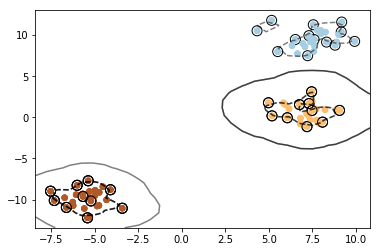

In [323]:
with h5py.File('Data/data_3.h5', 'r') as dataH5:
    labels = np.array(dataH5['y'])
    coordinates = np.array((dataH5['x']))
        #splitting dataset randomly into 80% train and 20% test
    x_train, x_test, y_train, y_test = train_test_split(coordinates, labels, test_size = 0.2)
    num_classes = len(np.unique(labels))
    
    predictions = np.full((len(x_test), num_classes), 0)
    predicted_class = []
    
    C_dict = {'C' : [1000, 500, 100, 50, 20, 10, 4, 3.5, 3, 2.5, 2, 1, 0.1, 0.005, 0.003]}
    Gamma_dict = {'Gamma' : [1000, 500, 100, 50, 20, 10, 4, 3.5, 3, 2.5, 2, 1, 0.1, 0.005, 0.003]}
    classifier = GridSearchCV(svm.SVC(kernel = 'rbf'), C_dict, scoring = 'accuracy')
    classifier.fit(x_train, y_train)
    C_rbf = classifier.best_params_.get("C")
    Gamma_rbf = classifier.best_params_.get("gamma")
    print ("chosen C = ", C_rbf)
    
    for i in range(num_classes):  #one vs one
        for j in range(num_classes):
            if (i == j):
                continue
            x_train_new = []
            y_train_new = []
            for k in range(len(x_train)):
                if (y_train[k] == i):
                    x_train_new.append(x_train[k])
                    y_train_new.append(0)
                elif (y_train[k] == j):
                    x_train_new.append(x_train[k])
                    y_train_new.append(1)
                    
            rbf_classifier = svm.SVC(kernel = 'rbf', C = C_rbf)
            rbf_classifier.fit(x_train_new, y_train_new)
            weights = linear_classifier.coef_[0]
            intercept = linear_classifier.intercept_[0]       
            for k in range(len(x_test)):
                value = np.dot(weights, x_test[k]) + intercept
                if (value < 0):
                    predictions[k][i]+=1
                else:
                    predictions[k][j]+=1
        plot_support_vectors(x_train, y_train, rbf_classifier)
#     print(predictions)
    for k in range(len(x_test)):
        predicted_class.append(np.argmax(predictions[k]))
#         print("appended value is: ", np.argmax(predictions[k]))

    test_correct_predictions = 0

    for i in range(len(x_test)):
        if (predicted_class[i] == y_test[i]):
            test_correct_predictions+=1

    print("pr ", test_correct_predictions/len(x_test))
    predicted_values = np.argmax(predictions, axis = 0)
#     print(predictions2, "hello")

In [170]:
def plot_support_vectors(X, Y, clf):
    
    cmap_type = plt.cm.Paired
    s_val = 30
    
    plt.scatter(X[:, 0], X[:, 1], s = s_val, c = Y, cmap = cmap_type)

    current_axes = plt.gca()
    xlim = current_axes.get_xlim()
    ylim = current_axes.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], s_val)
    yy = np.linspace(ylim[0], ylim[1], s_val)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 100,
               linewidth = 1, facecolors = 'none', edgecolors = 'k')

    #reference taken from: http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html

In [271]:
def plot_roc_curve(x_test, y_true, classifier):
    fpr = dict()
    tpr = dict()
    y_score = classifier.decision_function(x_test)
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    area_under_curve = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve area = %0.2f' %area_under_curve)
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.legend()
    plt.show()
    
#Reference taken from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [315]:
def plot_roc_curve_multi_class(coordinates, labels, num_classes, kernel_name):
    fpr = dict()
    tpr = dict()
    area_under_curve = dict()
    y = label_binarize(labels, classes=[0, 1, 2])
    x_train, x_test, y_train, y_test = train_test_split(coordinates, y, test_size = 0.2)
    classifier = OneVsRestClassifier(svm.SVC(kernel=kernel_name, probability=True))
    classifier.fit(x_train, y_train)
    y_score = classifier.decision_function(x_test)
#     fpr, tpr, thresholds = roc_curve(y_true, y_score)
#     area_under_curve = auc(fpr, tpr)
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        area_under_curve[i] = auc(fpr[i], tpr[i])
    
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    area_under_curve["micro"] = auc(fpr["micro"], tpr["micro"])
    
    
    plt.figure()
    lw = 2
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve (area = %0.2f)' % area_under_curve[i])

        plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    
#Reference taken from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html  

In [309]:
def plot_roc_curve_multi_class_hindi(coordinates, labels, num_classes):
    fpr = dict()
    tpr = dict()
    area_under_curve = dict()
    y = label_binarize(labels, classes=[0, 1, 2, 3, 4])
    x_train, x_test, y_train, y_test = train_test_split(coordinates, y, test_size = 0.2)
    classifier = OneVsRestClassifier(svm.SVC(kernel='rbf', probability=True))
    classifier.fit(x_train, y_train)
    y_score = classifier.decision_function(x_test)
#     fpr, tpr, thresholds = roc_curve(y_true, y_score)
#     area_under_curve = auc(fpr, tpr)
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        area_under_curve[i] = auc(fpr[i], tpr[i])
    
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    area_under_curve["micro"] = auc(fpr["micro"], tpr["micro"])
    
    
    plt.figure()
    lw = 2
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve (area = %0.2f)' % area_under_curve[i])

        plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

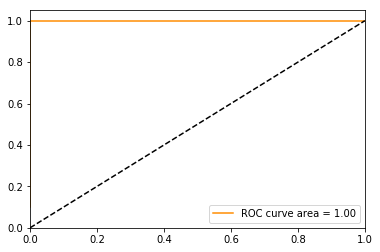

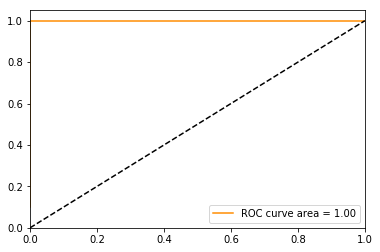

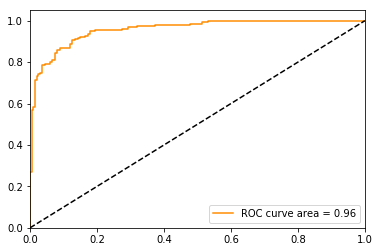

In [329]:
num_file = 1
for data_file in os.listdir('Data'):
    path = 'Data/' + data_file
    with h5py.File(path, 'r') as dataH5:    
        coordinates = np.array((dataH5['x']))
        labels = np.array(dataH5['y'])
        #splitting dataset randomly into 80% train and 20% test
        x_train, x_test, y_train, y_test = train_test_split(coordinates, labels, test_size = 0.2)
        linear_classifier = svm.SVC(kernel = 'linear')
        rbf_classifier = svm.SVC(kernel = 'rbf')
        linear_classifier.fit(x_train, y_train)
        rbf_classifier.fit(x_train, y_train)
        if (num_file!=3):
            plot_roc_curve(x_test, y_test, rbf_classifier)
    num_file+=1

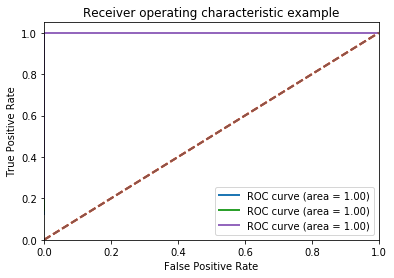

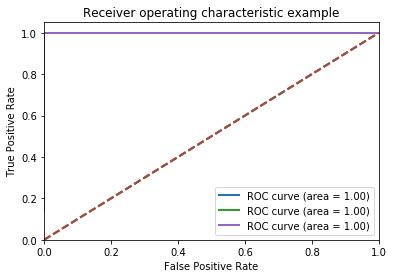

In [316]:
with h5py.File('./Data/data_3.h5', 'r') as dataH5:    
    coordinates = np.array((dataH5['x']))
    labels = np.array(dataH5['y'])

    #splitting dataset randomly into 80% train and 20% test
    x_train, x_test, y_train, y_test = train_test_split(coordinates, labels, test_size = 0.2)
    plot_roc_curve_multi_class(coordinates, labels, 3, "linear")
    plot_roc_curve_multi_class(coordinates, labels, 3, "rbf")



In [338]:
def make_confusion_matrix(y_test, y_predicted, num_classes):
    confusion_matrix = np.zeros(shape = (num_classes, num_classes))
    for i in range(len(y_test)):
        confusion_matrix[y_test[i], y_predicted[i]] += 1

    return confusion_matrix
        
#-----------------Following code reference was taken from Scikit learn website, but has been commented 
#-----------------as it was later clarified that there is no need to plot the confusion matrix-------#

#     plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
#     plt.title('Confusion matrix')
#     plt.colorbar()
#     classes = np.arange(num_classes)
#     tick_marks = np.arange(num_classes)
#     plt.xticks(tick_marks, classes, rotation=45)
#     plt.yticks(tick_marks, classes)

#     fmt = '.2f'
#     confusion_matrix = np.array(confusion_matrix)
#     thresh = confusion_matrix.max() / 2.
#     for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
#         plt.text(j, i, format(confusion_matrix[i, j], fmt),
#                  horizontalalignment="center",
#                  color="orange" if confusion_matrix[i, j] > thresh else "black")

#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')
#     plt.tight_layout()




# Hindi Dataset

In [ ]:
train_set = []
labels = []
class_label = 0
                                          
parameters = {'C' : [1000, 500, 100, 50, 20, 10, 4, 3.5, 3, 2.5, 2, 1, 0.1, 0.005, 0.003],  'gamma' : [10, 4, 3.5, 3, 2.5, 2, 1, 0.1, 0.005, 0.003] }
classifier = GridSearchCV(svm.SVC(kernel = 'rbf'), parameters, cv=5)

for folder in os.listdir('Train_val_Handwritten_Hindi_dataset\Train_val\\'):
    path = 'Train_val_Handwritten_Hindi_dataset\Train_val\\' + folder + '\\'
    for file in os.listdir(path):
        img = mpimg.imread(path + file)
        img = img.reshape((img.shape[0]*img.shape[1]))
        labels.append(class_label)
        train_set.append(img)
    class_label += 1
Gamma_rbf = 1
train_set = np.array(train_set)
labels = np.array(labels)
print (train_set.shape, labels.shape)



test_set = []
test_labels = []
class_label = 0

for folder in os.listdir('Test_Handwritten_Hindi_dataset\Test\\'):
    path = 'Test_Handwritten_Hindi_dataset\Test\\' + folder + '\\'
    for file in os.listdir(path):
        img = mpimg.imread(path + file)
        img = img.reshape((img.shape[0]*img.shape[1]))
        test_labels.append(class_label)
        test_set.append(img)
    class_label += 1

classifier.fit(train_set, labels)
# print("fitted")
# C_rbf = classifier.best_params_.get("C")
# print ("chosen C = ", C_rbf)
# print ("chosen Gamma = ", classifier.best_params_.get("gamma"))
# pickle.dump(classifier, open( "classifier_final.p", "wb" ) )

# classifier2 = svm.SVC(kernel = 'rbf', C = C_rbf)
# classifier2.fit(train_set, labels)

# test_set = []
# test_labels = []
# class_label = 0

# for folder in os.listdir('Test_Handwritten_Hindi_dataset\Test\\'):
#     path = 'Test_Handwritten_Hindi_dataset\Test\\' + folder + '\\'
#     for file in os.listdir(path):
#         img = mpimg.imread(path + file)
#         img = img.reshape((img.shape[0]*img.shape[1]))
#         test_labels.append(class_label)
#         test_set.append(img)
#     class_label += 1
    
# y_predicted = classifier.predict(test_set)
# print(accuracy_score(test_labels, y_predicted))
# pickel.dumps(classifier)
# pickel.dumps(classifier2)
# #with h5py.File(path, 'r') as dataH5:
# #img = mpimg.imread('g4g.png') 

In [ ]:
classifier = pickle.load( open( "classifier.p", "rb" ) )
classifier_rbf = svm.SVC(kernel = 'rbf', C = 100, gamma = 0.005)
classifier_rbf.fit(train_set, labels)
pickle.dump(classifier_rbf, open( "classifier_rbf.p", "wb" ) )



In [ ]:
# dictionary = 
classifier = pickle.load( open( "classifier.p", "rb" ) )
train_accuracy = classifier.cv_results_.get('mean_test_score')
print(train_accuracy[0])

In [ ]:
y_predicted = classifier_rbf.predict(test_set)
print("Test accuracy is: ", accuracy_score(test_labels, y_predicted))
y_predicted_train = classifier_rbf.predict(train_set)
print("Test accuracy is: ", accuracy_score(labels, y_predicted_train))

In [ ]:
tsne_images = TSNE(n_components=2).fit_transform(train_set)

In [ ]:
classifier_rbf_tsne = svm.SVC(kernel = 'rbf', C = C_rbf)
classifier_rbf_tsne.fit(tsne_images, labels)
pickle.dump(classifier_rbf_tsne, open( "classifier_rbf_tsne.p", "wb" ) )

In [ ]:
y_predicted_tsne = classifier_rbf_tsne.predict(tsne_images)
print(accuracy_score(labels, y_predicted_tsne))

In [ ]:
plot_decision_regions(X = tsne_images, y = labels, clf = classifier_rbf_tsne)

In [ ]:
classifier2 = svm.SVC(kernel = 'rbf', C = C_rbf)
classifier2.fit(train_set, labels)

test_set = []
test_labels = []
class_label = 0

for folder in os.listdir('Test_Handwritten_Hindi_dataset\Test\\'):
    path = 'Test_Handwritten_Hindi_dataset\Test\\' + folder + '\\'
    for file in os.listdir(path):
        img = mpimg.imread(path + file)
        img = img.reshape((img.shape[0]*img.shape[1]))
        test_labels.append(class_label)
        test_set.append(img)
    class_label += 1
    
y_predicted = classifier.predict(test_set)
print(accuracy_score(test_labels, y_predicted))

In [ ]:
make_confusion_matrix(test_labels, y_predicted, 5)